In [477]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [478]:
data = pd.read_csv('spotify_dataset.csv')
data

Index  Highest Charting Position  Number of Times Charted  \
0         1                          1                        8   
1         2                          2                        3   
2         3                          1                       11   
3         4                          3                        5   
4         5                          5                        1   
...     ...                        ...                      ...   
1551   1552                        195                        1   
1552   1553                        196                        1   
1553   1554                        197                        1   
1554   1555                        198                        1   
1555   1556                        199                        1   

     Week of Highest Charting                           Song Name     Streams  \
0      2021-07-23--2021-07-30                             Beggin'  48,633,449   
1      2021-07-23--2021-07-30           STAY (with Justin Bieber)  47,248,719   
2      2021-06-25--2021-07-02                            good 4 u  40,162,559   
3      2021-07-02--2021-07-09                          Bad Habits  37,799,456   
4      2021-07-23--2021-07-30   INDUSTRY BABY (feat. Jack Harlow)  33,948,454   
...                       ...                                 ...         ...   
1551   2019-12-27--2020-01-03                           New Rules   4,630,675   
1552   2019-12-27--2020-01-03                  Cheirosa - Ao Vivo   4,623,030   
1553   2019-12-27--2020-01-03           Havana (feat. Young Thug)   4,620,876   
1554   2019-12-27--2020-01-03          Surtada - Remix Brega Funk   4,607,385   
1555   2019-12-27--2020-01-03  Lover (Remix) [feat. Shawn Mendes]   4,595,450   

                             Artist Artist Followers                 Song ID  \
0                          Måneskin          3377762  3Wrjm47oTz2sjIgck11l5e   
1                     The Kid LAROI          2230022  5HCyWlXZPP0y6Gqq8TgA20   
2                    Olivia Rodrigo          6266514  4ZtFanR9U6ndgddUvNcjcG   
3                        Ed Sheeran         83293380  6PQ88X9TkUIAUIZJHW2upE   
4                         Lil Nas X          5473565  27NovPIUIRrOZoCHxABJwK   
...                             ...              ...                     ...   
1551                       Dua Lipa         27167675  2ekn2ttSfGqwhhate0LSR0   
1552                 Jorge & Mateus         15019109  2PWjKmjyTZeDpmOUa3a5da   
1553                 Camila Cabello         22698747  1rfofaqEpACxVEHIZBJe6W   
1554  Dadá Boladão, Tati Zaqui, OIK           208630  5F8ffc8KWKNawllr5WsW0r   
1555                   Taylor Swift         42227614  3i9UVldZOE0aD0JnyfAZZ0   

                                                  Genre  ... Danceability  \
0                ['indie rock italiano', 'italian pop']  ...        0.714   
1                                ['australian hip hop']  ...        0.591   
2                                               ['pop']  ...        0.563   
3                                     ['pop', 'uk pop']  ...        0.808   
4                         ['lgbtq+ hip hop', 'pop rap']  ...        0.736   
...                                                 ...  ...          ...   
1551                     ['dance pop', 'pop', 'uk pop']  ...        0.762   
1552           ['sertanejo', 'sertanejo universitario']  ...        0.528   
1553  ['dance pop', 'electropop', 'pop', 'post-teen ...  ...        0.765   
1554                     ['brega funk', 'funk carioca']  ...        0.832   
1555                           ['pop', 'post-teen pop']  ...        0.448   

     Energy Loudness Speechiness Acousticness Liveness    Tempo Duration (ms)  \
0       0.8   -4.808      0.0504        0.127    0.359  134.002        211560   
1     0.764   -5.484      0.0483       0.0383    0.103  169.928        141806   
2     0.664   -5.044       0.154        0.335   0.0849  166.928        178147   
3     0.897   -3.7

In [479]:
data.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

In [480]:
data = data.drop(['Index','Week of Highest Charting','Song Name','Streams','Song ID','Weeks Charted'],axis=1)
data.head()

Highest Charting Position  Number of Times Charted          Artist  \
0                          1                        8        Måneskin   
1                          2                        3   The Kid LAROI   
2                          1                       11  Olivia Rodrigo   
3                          3                        5      Ed Sheeran   
4                          5                        1       Lil Nas X   

  Artist Followers                                   Genre Release Date  \
0          3377762  ['indie rock italiano', 'italian pop']   2017-12-08   
1          2230022                  ['australian hip hop']   2021-07-09   
2          6266514                                 ['pop']   2021-05-21   
3         83293380                       ['pop', 'uk pop']   2021-06-25   
4          5473565           ['lgbtq+ hip hop', 'pop rap']   2021-07-23   

  Popularity Danceability Energy Loudness Speechiness Acousticness Liveness  \
0        100        0.714    0.8   -4.808      0.0504        0.127    0.359   
1         99        0.591  0.764   -5.484      0.0483       0.0383    0.103   
2         99        0.563  0.664   -5.044       0.154        0.335   0.0849   
3         98        0.808  0.897   -3.712      0.0348       0.0469    0.364   
4         96        0.736  0.704   -7.409      0.0615       0.0203   0.0501   

     Tempo Duration (ms) Valence  Chord  
0  134.002        211560   0.589      B  
1  169.928        141806   0.478  C#/Db  
2  166.928        178147   0.688      A  
3  126.026        231041   0.591      B  
4  149.995        212000   0.894  D#/Eb

In [481]:
Artist=data['Artist'].value_counts()
Artist=pd.DataFrame(Artist)
Artist

Artist
Taylor Swift                       52
Lil Uzi Vert                       32
Justin Bieber                      32
Juice WRLD                         30
Pop Smoke                          29
...                               ...
Chris Brown, Young Thug             1
Rauw Alejandro, J Balvin            1
347aidan                            1
Migrantes, Alico                    1
Dadá Boladão, Tati Zaqui, OIK       1

[716 rows x 1 columns]

In [482]:
Artist.size

716

In [483]:
Genre=data['Genre'].value_counts()
Genre=pd.DataFrame(Genre)
Genre

Genre
[]                                                     75
['dance pop', 'pop', 'post-teen pop']                  71
['latin', 'reggaeton', 'trap latino']                  63
['pop', 'post-teen pop']                               57
['melodic rap', 'philly rap', 'rap', 'trap']           33
...                                                   ...
['trap queen']                                          1
['dream smp', 'viral rap']                              1
['disco', 'europop', 'new romantic', 'new wave'...      1
['adult standards', 'brill building pop', 'easy...      1
['gangster rap', 'hip hop', 'pop rap', 'rap', '...      1

[395 rows x 1 columns]

In [484]:
Genre.size

395

In [485]:
Genre_count=Genre[Genre.Genre==1]
Genre_count.size

213

In [486]:
Chord=data['Chord'].value_counts()
Chord=pd.DataFrame(Chord)
Chord

Chord
C#/Db    214
C        155
B        141
G        136
F        131
G#/Ab    130
D        125
A#/Bb    122
F#/Gb    121
A        118
E        112
D#/Eb     40
          11

In [487]:
Chord.size

13

In [488]:
data.head()

Highest Charting Position  Number of Times Charted          Artist  \
0                          1                        8        Måneskin   
1                          2                        3   The Kid LAROI   
2                          1                       11  Olivia Rodrigo   
3                          3                        5      Ed Sheeran   
4                          5                        1       Lil Nas X   

  Artist Followers                                   Genre Release Date  \
0          3377762  ['indie rock italiano', 'italian pop']   2017-12-08   
1          2230022                  ['australian hip hop']   2021-07-09   
2          6266514                                 ['pop']   2021-05-21   
3         83293380                       ['pop', 'uk pop']   2021-06-25   
4          5473565           ['lgbtq+ hip hop', 'pop rap']   2021-07-23   

  Popularity Danceability Energy Loudness Speechiness Acousticness Liveness  \
0        100        0.714    0.8   -4.808      0.0504        0.127    0.359   
1         99        0.591  0.764   -5.484      0.0483       0.0383    0.103   
2         99        0.563  0.664   -5.044       0.154        0.335   0.0849   
3         98        0.808  0.897   -3.712      0.0348       0.0469    0.364   
4         96        0.736  0.704   -7.409      0.0615       0.0203   0.0501   

     Tempo Duration (ms) Valence  Chord  
0  134.002        211560   0.589      B  
1  169.928        141806   0.478  C#/Db  
2  166.928        178147   0.688      A  
3  126.026        231041   0.591      B  
4  149.995        212000   0.894  D#/Eb

In [489]:
data.dtypes

Highest Charting Position     int64
Number of Times Charted       int64
Artist                       object
Artist Followers             object
Genre                        object
Release Date                 object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
dtype: object

In [490]:
print(data['Artist'].unique())
print('************')
print(data['Genre'].unique())
print('************')
print(data['Chord'].unique())

['Måneskin' 'The Kid LAROI' 'Olivia Rodrigo' 'Ed Sheeran' 'Lil Nas X'
 'Doja Cat' 'Rauw Alejandro' 'Bad Bunny' 'Dua Lipa'
 'J Balvin, Maria Becerra' 'BTS' 'Justin Bieber' 'The Weeknd'
 'Nio Garcia, J Balvin, Bad Bunny' 'Mora, Bad Bunny, Sech' 'Glass Animals'
 'Farruko' 'Post Malone' 'Riton, Nightcrawlers' 'Masked Wolf'
 'Bruno Mars, Anderson .Paak, Silk Sonic' 'Camila Cabello'
 'Sebastian Yatra, Myke Towers' 'Harry Styles' 'Polo G'
 'Doja Cat, The Weeknd' 'Sech, Jhay Cortez' 'Bad Bunny, Jhay Cortez'
 'TINI, Maria Becerra'
 'J Balvin, KAROL G, Nicky Jam, Crissin, Totoy El Frio, Natan & Shander'
 'Tiësto' 'Galantis' '24kGoldn' 'Tiago PZK, LIT killah'
 'Wisin, Jhay Cortez, Anuel AA, Los Legendarios, Myke Towers'
 'Bella Poarch' 'Bizarrap, Nicky Jam'
 'Marc Seguí, Rauw Alejandro, Pol Granch' 'Billie Eilish'
 'Majestic, Boney M.' 'Marshmello' 'Surf Curse' 'João Gomes'
 'Rauw Alejandro, Mr. Naisgai' 'Maroon 5' 'OneRepublic'
 'Megan Thee Stallion' 'ATB, Topic, A7S' 'Giveon' 'Trinidad Cardona'

In [491]:
data['Release Date']=pd.to_datetime(data['Release Date'],infer_datetime_format=True,errors='coerce')
data['month']=data['Release Date'].dt.month

data=data.drop('Release Date',axis=1)
data.head()

Highest Charting Position  Number of Times Charted          Artist  \
0                          1                        8        Måneskin   
1                          2                        3   The Kid LAROI   
2                          1                       11  Olivia Rodrigo   
3                          3                        5      Ed Sheeran   
4                          5                        1       Lil Nas X   

  Artist Followers                                   Genre Popularity  \
0          3377762  ['indie rock italiano', 'italian pop']        100   
1          2230022                  ['australian hip hop']         99   
2          6266514                                 ['pop']         99   
3         83293380                       ['pop', 'uk pop']         98   
4          5473565           ['lgbtq+ hip hop', 'pop rap']         96   

  Danceability Energy Loudness Speechiness Acousticness Liveness    Tempo  \
0        0.714    0.8   -4.808      0.0504        0.127    0.359  134.002   
1        0.591  0.764   -5.484      0.0483       0.0383    0.103  169.928   
2        0.563  0.664   -5.044       0.154        0.335   0.0849  166.928   
3        0.808  0.897   -3.712      0.0348       0.0469    0.364  126.026   
4        0.736  0.704   -7.409      0.0615       0.0203   0.0501  149.995   

  Duration (ms) Valence  Chord  month  
0        211560   0.589      B   12.0  
1        141806   0.478  C#/Db    7.0  
2        178147   0.688      A    5.0  
3        231041   0.591      B    6.0  
4        212000   0.894  D#/Eb    7.0

In [492]:
data.dtypes

Highest Charting Position      int64
Number of Times Charted        int64
Artist                        object
Artist Followers              object
Genre                         object
Popularity                    object
Danceability                  object
Energy                        object
Loudness                      object
Speechiness                   object
Acousticness                  object
Liveness                      object
Tempo                         object
Duration (ms)                 object
Valence                       object
Chord                         object
month                        float64
dtype: object

In [493]:
data['Artist Followers'][0]

'3377762'

In [494]:
#converting object to float

In [495]:
#to_numeric  --to convert to numeric form or float
#errors='coerce'--to convert non numerical values to nan values
data['Artist Followers']=pd.to_numeric(data['Artist Followers'],errors='coerce')
data['Popularity']=pd.to_numeric(data['Popularity'],errors='coerce')
data['Danceability']=pd.to_numeric(data['Danceability'],errors='coerce')
data['Energy']=pd.to_numeric(data['Energy'],errors='coerce')
data['Loudness']=pd.to_numeric(data['Loudness'],errors='coerce')
data['Speechiness']=pd.to_numeric(data['Speechiness'],errors='coerce')
data['Acousticness']=pd.to_numeric(data['Acousticness'],errors='coerce')
data['Liveness']=pd.to_numeric(data['Liveness'],errors='coerce')
data['Tempo']=pd.to_numeric(data['Tempo'],errors='coerce')
data['Duration (ms)']=pd.to_numeric(data['Duration (ms)'],errors='coerce')
data['Valence']=pd.to_numeric(data['Valence'],errors='coerce')

In [496]:
data.dtypes

Highest Charting Position      int64
Number of Times Charted        int64
Artist                        object
Artist Followers             float64
Genre                         object
Popularity                   float64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration (ms)                float64
Valence                      float64
Chord                         object
month                        float64
dtype: object

In [497]:
data.isnull().sum()

Highest Charting Position     0
Number of Times Charted       0
Artist                        0
Artist Followers             11
Genre                         0
Popularity                   11
Danceability                 11
Energy                       11
Loudness                     11
Speechiness                  11
Acousticness                 11
Liveness                     11
Tempo                        11
Duration (ms)                11
Valence                      11
Chord                         0
month                        11
dtype: int64

In [498]:
#filling nan values

In [499]:
# to do? display the nan values 

In [500]:
data=data.dropna()
data

Highest Charting Position  Number of Times Charted  \
0                             1                        8   
1                             2                        3   
2                             1                       11   
3                             3                        5   
4                             5                        1   
...                         ...                      ...   
1551                        195                        1   
1552                        196                        1   
1553                        197                        1   
1554                        198                        1   
1555                        199                        1   

                             Artist  Artist Followers  \
0                          Måneskin         3377762.0   
1                     The Kid LAROI         2230022.0   
2                    Olivia Rodrigo         6266514.0   
3                        Ed Sheeran        83293380.0   
4                         Lil Nas X         5473565.0   
...                             ...               ...   
1551                       Dua Lipa        27167675.0   
1552                 Jorge & Mateus        15019109.0   
1553                 Camila Cabello        22698747.0   
1554  Dadá Boladão, Tati Zaqui, OIK          208630.0   
1555                   Taylor Swift        42227614.0   

                                                  Genre  Popularity  \
0                ['indie rock italiano', 'italian pop']       100.0   
1                                ['australian hip hop']        99.0   
2                                               ['pop']        99.0   
3                                     ['pop', 'uk pop']        98.0   
4                         ['lgbtq+ hip hop', 'pop rap']        96.0   
...                                                 ...         ...   
1551                     ['dance pop', 'pop', 'uk pop']        79.0   
1552           ['sertanejo', 'sertanejo universitario']        66.0   
1553  ['dance pop', 'electropop', 'pop', 'post-teen ...        81.0   
1554                     ['brega funk', 'funk carioca']        60.0   
1555                           ['pop', 'post-teen pop']        70.0   

      Danceability  Energy  Loudness  Speechiness  Acousticness  Liveness  \
0            0.714   0.800    -4.808       0.0504       0.12700    0.3590   
1            0.591   0.764    -5.484       0.0483       0.03830    0.1030   
2            0.563   0.664    -5.044       0.1540       0.33500    0.0849   
3            0.808   0.897    -3.712       0.0348       0.04690    0.3640   
4            0.736   0.704    -7.409       0.0615       0.02030    0.0501   
...            ...     ...       ...          ...           ...       ...   
1551         0.762   0.700    -6.021       0.0694       0.00261    0.1530   
1552         0.528   0.870    -3.123       0.0851       0.24000    0.3330   
1553         0.765   0.523    -4.333       0.0300       0.18400    0.1320   
1554         0.832   0.550    -7.026       0.0587       0.24900    0.1820   
1555         0.448   0.603    -7.176       0.0640       0.43300    0.0862   

        Tempo  Duration (ms)  Valence  Chord  month  
0     134.002       211560.0    0.589      B   12.0  
1     169.928       141806.0    0.478  C#/Db    7.0  
2     166.928       178147.0    0.688      A    5.0  
3     126.026       231041.0    0.591      B    6.0  
4     149.995       212000.0    0.894  D#/Eb    7.0  
...       ...            ...      ...    ...    ...  
1551  116.073       209320.0    0.608      A    6.0  
1552  152.370       181930.0    0.714      B   10.0  
1553  104.988       217307.0    0.394      D    1.0  
1554  154.064       152784.0    0.881      F    9.0  
1555  205.272       221307.0    0.422      G   11.0  

[1545 rows x 17 columns]

In [501]:
scaler =MinMaxScaler()

#data['Artist'] =scaler.fit_transform(data[['Artist']])
data['Artist Followers'] =scaler.fit_transform(data[['Artist Followers']])
#data['Genre'] =scaler.fit_transform(data[['Genre']])
data['Popularity'] =scaler.fit_transform(data[['Popularity']])
data['Danceability'] =scaler.fit_transform(data[['Danceability']])
data['Energy'] =scaler.fit_transform(data[['Energy']])
data['Loudness'] =scaler.fit_transform(data[['Loudness']])
data['Speechiness'] =scaler.fit_transform(data[['Speechiness']])
data['Acousticness'] =scaler.fit_transform(data[['Acousticness']])
data['Liveness'] =scaler.fit_transform(data[['Liveness']])
data['Tempo'] =scaler.fit_transform(data[['Tempo']])
data['Duration (ms)'] =scaler.fit_transform(data[['Duration (ms)']])
data['Valence'] =scaler.fit_transform(data[['Valence']])
#data['Chord'] =scaler.fit_transform(data[['Chord']])
#data['month'] =scaler.fit_transform(data[['month']])

data.head()

Highest Charting Position  Number of Times Charted          Artist  \
0                          1                        8        Måneskin   
1                          2                        3   The Kid LAROI   
2                          1                       11  Olivia Rodrigo   
3                          3                        5      Ed Sheeran   
4                          5                        1       Lil Nas X   

   Artist Followers                                   Genre  Popularity  \
0          0.040475  ['indie rock italiano', 'italian pop']        1.00   
1          0.026702                  ['australian hip hop']        0.99   
2          0.075140                                 ['pop']        0.99   
3          0.999467                       ['pop', 'uk pop']        0.98   
4          0.065625           ['lgbtq+ hip hop', 'pop rap']        0.96   

   Danceability    Energy  Loudness  Speechiness  Acousticness  Liveness  \
0      0.679518  0.814410  0.763187     0.031599      0.127744  0.360076   
1      0.531325  0.775109  0.737844     0.029159      0.038507  0.088401   
2      0.497590  0.665939  0.754339     0.151952      0.337005  0.069192   
3      0.792771  0.920306  0.804274     0.013476      0.047159  0.365383   
4      0.706024  0.709607  0.665679     0.044493      0.020397  0.032261   

      Tempo  Duration (ms)   Valence  Chord  month  
0  0.550500       0.325134  0.588173      B   12.0  
1  0.777085       0.200129  0.470961  C#/Db    7.0  
2  0.758164       0.265255  0.692714      A    5.0  
3  0.500196       0.360046  0.590285      B    6.0  
4  0.651368       0.325923  0.910243  D#/Eb    7.0

In [502]:
 le =LabelEncoder()
    
data['Artist'] =le.fit_transform(data['Artist'])
data['Genre'] =le.fit_transform(data['Genre'])  
data['Chord'] =le.fit_transform(data['Chord'])

data.head()

Highest Charting Position  Number of Times Charted  Artist  \
0                          1                        8     469   
1                          2                        3     643   
2                          1                       11     500   
3                          3                        5     203   
4                          5                        1     381   

   Artist Followers  Genre  Popularity  Danceability    Energy  Loudness  \
0          0.040475    276        1.00      0.679518  0.814410  0.763187   
1          0.026702     63        0.99      0.531325  0.775109  0.737844   
2          0.075140    364        0.99      0.497590  0.665939  0.754339   
3          0.999467    363        0.98      0.792771  0.920306  0.804274   
4          0.065625    312        0.96      0.706024  0.709607  0.665679   

   Speechiness  Acousticness  Liveness     Tempo  Duration (ms)   Valence  \
0     0.031599      0.127744  0.360076  0.550500       0.325134  0.588173   
1     0.029159      0.038507  0.088401  0.777085       0.200129  0.470961   
2     0.151952      0.337005  0.069192  0.758164       0.265255  0.692714   
3     0.013476      0.047159  0.365383  0.500196       0.360046  0.590285   
4     0.044493      0.020397  0.032261  0.651368       0.325923  0.910243   

   Chord  month  
0      2   12.0  
1      4    7.0  
2      0    5.0  
3      2    6.0  
4      6    7.0

# ploting

<AxesSubplot:title={'center':'Top in Artist Followers'}, xlabel='Popularity', ylabel='Artist Followers'>

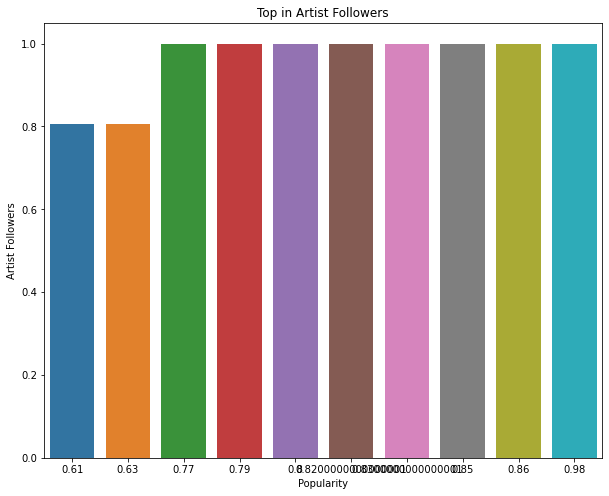

In [503]:
sort=data.sort_values(by=['Artist Followers'],ascending=False)
plt.figure(figsize=[10,8])
plt.title('Top in Artist Followers')
sns.barplot(x='Popularity',y='Artist Followers',data=sort.head(10))

<AxesSubplot:title={'center':'Top in Danceability'}, xlabel='Popularity', ylabel='Danceability'>

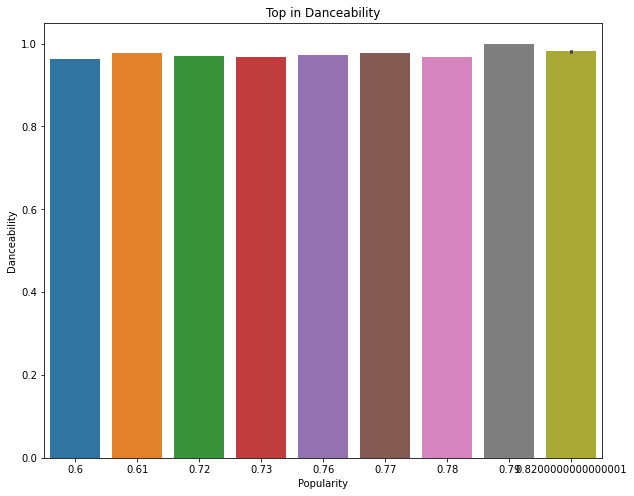

In [504]:
sort=data.sort_values(by=['Danceability'],ascending=False)
plt.figure(figsize=[10,8])
plt.title('Top in Danceability')
sns.barplot(x='Popularity',y='Danceability',data=sort.head(10))

<AxesSubplot:title={'center':'Top in Energy'}, xlabel='Popularity', ylabel='Energy'>

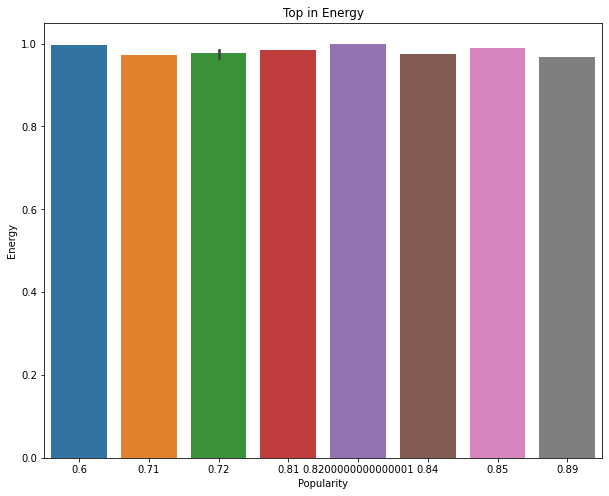

In [505]:
sort=data.sort_values(by=['Energy'],ascending=False)
plt.figure(figsize=[10,8])
plt.title('Top in Energy')
sns.barplot(x='Popularity',y='Energy',data=sort.head(10))

<AxesSubplot:title={'center':'Top in Loudness'}, xlabel='Popularity', ylabel='Loudness'>

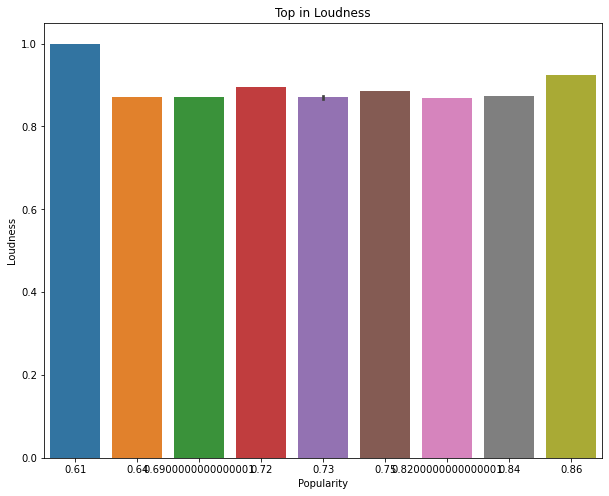

In [506]:
sort=data.sort_values(by=['Loudness'],ascending=False)
plt.figure(figsize=[10,8])
plt.title('Top in Loudness')
sns.barplot(x='Popularity',y='Loudness',data=sort.head(10))

<AxesSubplot:title={'center':'Top in Chord'}, xlabel='Popularity', ylabel='Chord'>

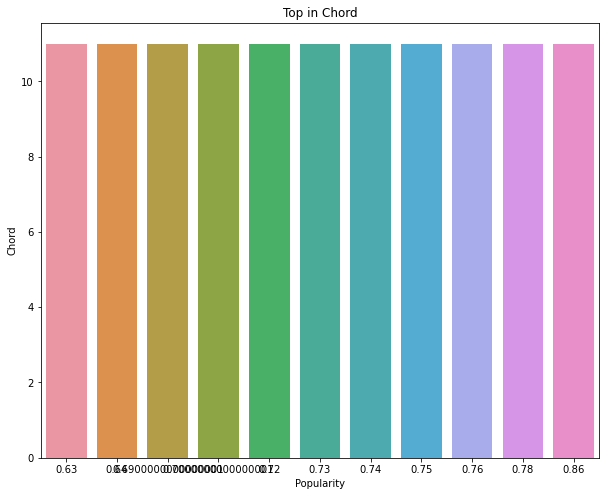

In [507]:
sort=data.sort_values(by=['Chord'],ascending=False)
plt.figure(figsize=[10,8])
plt.title('Top in Chord')
sns.barplot(x='Popularity',y='Chord',data=sort.head(12))

<AxesSubplot:title={'center':'Top in month'}, xlabel='Popularity', ylabel='month'>

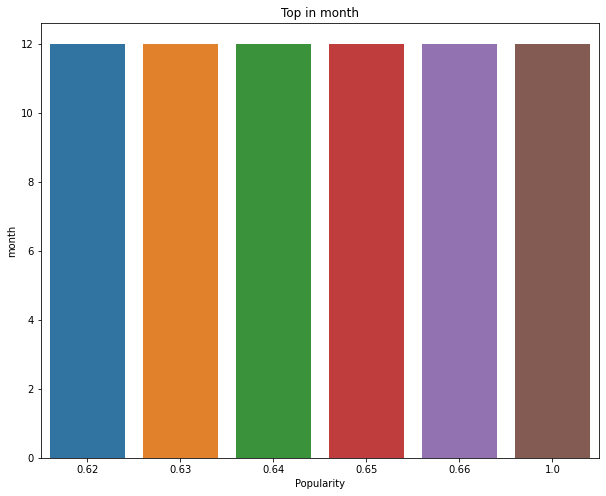

In [508]:
sort=data.sort_values(by=['month'],ascending=False)
plt.figure(figsize=[10,8])
plt.title('Top in month')
sns.barplot(x='Popularity',y='month',data=sort.head(12))

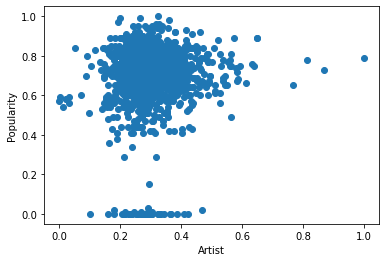

In [509]:
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.scatter(data['Duration (ms)'],data['Popularity'])

# Correlation

<AxesSubplot:>

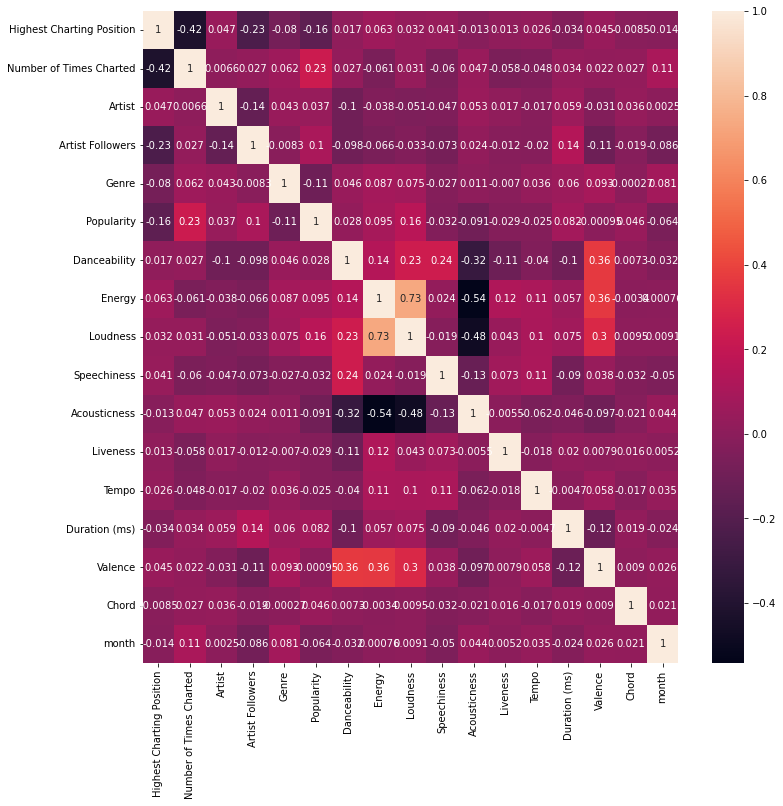

In [510]:
c=data.corr()
plt.figure(figsize=[12,12])
sns.heatmap(c,annot=True)

In [511]:
print(data['Artist'].corr(data['Popularity']))
print(data['Artist Followers'].corr(data['Popularity']))
print(data['Danceability'].corr(data['Popularity']))
print(data['Loudness'].corr(data['Popularity']))
print(data['Duration (ms)'].corr(data['Popularity']))

print(data['Chord'].corr(data['Popularity']))
print(data['Energy'].corr(data['Popularity']))

print(data['month'].corr(data['Popularity']))


0.03732347786491108
0.10435772123165069
0.028434691817529237
0.1587674680318133
0.08209572542261855
0.04578761512655858
0.09469051758444466
-0.06380392190329015


In [512]:
print(data['Liveness'].corr(data['Popularity']))
print(data['Speechiness'].corr(data['Popularity']))
print(data['Tempo'].corr(data['Popularity']))
print(data['Acousticness'].corr(data['Popularity']))
print(data['Valence'].corr(data['Popularity']))
print(data['Genre'].corr(data['Popularity']))


-0.029459634726915363
-0.032090633591528
-0.02495087653404515
-0.09124461072497658
-0.000953392411440151
-0.10758887170189574


In [513]:
data =data.drop(['Artist','Chord','month'],axis=1)
data.head()

Highest Charting Position  Number of Times Charted  Artist Followers  \
0                          1                        8          0.040475   
1                          2                        3          0.026702   
2                          1                       11          0.075140   
3                          3                        5          0.999467   
4                          5                        1          0.065625   

   Genre  Popularity  Danceability    Energy  Loudness  Speechiness  \
0    276        1.00      0.679518  0.814410  0.763187     0.031599   
1     63        0.99      0.531325  0.775109  0.737844     0.029159   
2    364        0.99      0.497590  0.665939  0.754339     0.151952   
3    363        0.98      0.792771  0.920306  0.804274     0.013476   
4    312        0.96      0.706024  0.709607  0.665679     0.044493   

   Acousticness  Liveness     Tempo  Duration (ms)   Valence  
0      0.127744  0.360076  0.550500       0.325134  0.588173  
1      0.038507  0.088401  0.777085       0.200129  0.470961  
2      0.337005  0.069192  0.758164       0.265255  0.692714  
3      0.047159  0.365383  0.500196       0.360046  0.590285  
4      0.020397  0.032261  0.651368       0.325923  0.910243

In [514]:
x=data.drop('Popularity',axis=1)
y=data['Popularity']

In [515]:
model_params={'AdaBoostRegressor':{'model':AdaBoostRegressor(),'params':{}},
              'GradientBoostingRegressor':{'model':GradientBoostingRegressor(),'params':{}},
              'XGBRFRegressor':{'model':XGBRFRegressor(),'params':{}}}

In [516]:
scores = []
models = ['AdaBoostRegressor','GradientBoostingRegressor','XGBRFRegressor']
for model_name in models:
    mp=model_params[model_name]
    gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(x,y)
    scores.append({'model':model_name, 'best_score':gds.best_score_ , 'best_params':gds.best_params_})

In [517]:
scores

[{'model': 'AdaBoostRegressor',
  'best_score': 0.3796800036899251,
  'best_params': {}},
 {'model': 'GradientBoostingRegressor',
  'best_score': 0.5087703582343017,
  'best_params': {}},
 {'model': 'XGBRFRegressor',
  'best_score': 0.5324152437048296,
  'best_params': {}}]

In [518]:
model_params = {'DecisionTreeRegressor':{'model':DecisionTreeRegressor(),'params':{'max_depth':[3,4,5,6]}},
               'RandomForestRegressor':{'model':RandomForestRegressor(),'params':{'n_estimators':[5,10,15,20],'max_depth':[3,4,5,6,7]}}}
                                                                             
                                                      
        

In [519]:
scores = []
models = ['DecisionTreeRegressor','RandomForestRegressor']
for model_name in models:
    mp=model_params[model_name]
    gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(x,y)
    scores.append({'model':model_name, 'best_score':gds.best_score_ , 'best_params':gds.best_params_})

In [520]:
scores

[{'model': 'DecisionTreeRegressor',
  'best_score': 0.485848440003015,
  'best_params': {'max_depth': 4}},
 {'model': 'RandomForestRegressor',
  'best_score': 0.5453108316635796,
  'best_params': {'max_depth': 4, 'n_estimators': 15}}]

In [288]:
from sklearn.model_selection import KFold ,StratifiedKFold
from sklearn.model_selection import cross_val_score

In [250]:
dt_score =cross_val_score(DecisionTreeRegressor(),X=x, y=y, cv=4)
rf_score =cross_val_score(RandomForestRegressor(random_state=10),X=x, y=y, cv=4)
XGB_model=cross_val_score(XGBRFRegressor(),X=x, y=y, cv=4)

In [251]:
print(dt_score)
print(rf_score)
print(XGB_model)

[0.22004638 0.08466434 0.30609705 0.15407105]
[0.36115157 0.47805395 0.73503161 0.6060493 ]
[0.37508022 0.49104568 0.73369114 0.58678   ]


In [252]:
print(dt_score.mean())
print(rf_score.mean())
print(XGB_model.mean())

0.19121970572406025
0.5450716079726523
0.5466492572622661


In [235]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=33)

In [236]:
XGBR=XGBRFRegressor()
model=XGBR.fit(x_train,y_train)XGBRFRegressor
model.score(x_test,y_test)

0.6947763381076535

In [240]:
RandomForest=RandomForestRegressor(n_estimators=8,random_state=10,)
model=RandomForest.fit(x_train,y_train)
model.score(x_test,y_test)

0.6578158964853207

In [238]:
DecisionTree=DecisionTreeRegressor()
model=DecisionTree.fit(x_train,y_train)
model.score(x_test,y_test)

0.4656002516651149